# Prediction of heart disease classification

In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
#Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import  precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [3]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape # rows and columns

(303, 14)

## data exploration
 tthe goal is to find out more about the data and become subject matter export on the dataset you working with
    
    1.what question are you trying to solve?
    2.what type of data we have & how do we treat with different types
    3.what's missing from data and how do you deal with it
    4.where are the outliers and why should you care about it
    5.how can you add,remove change features to get out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# let find out how many class each there are
df["target"].value_counts()  # 1= yes and 0=no

1    165
0    138
Name: target, dtype: int64

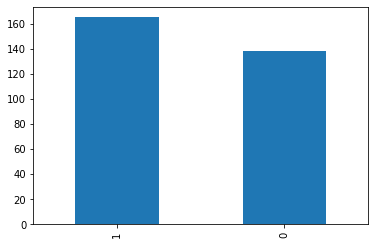

In [8]:
df["target"].value_counts().plot(kind='bar');

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
#are there any missing values

df.isna().sum() #or df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to feature sex

In [12]:
df.sex.value_counts() # 1-male, 0-female

1    207
0     96
Name: sex, dtype: int64

In [13]:
# compare target with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


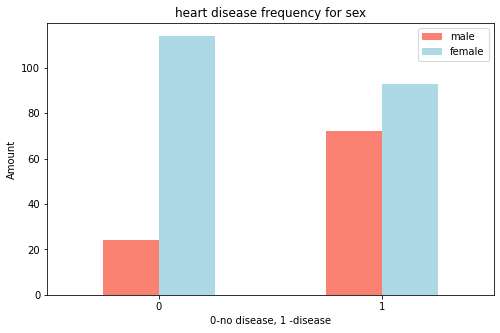

In [14]:
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(8,5),color=['salmon', 'lightblue']);
plt.xlabel("0-no disease, 1 -disease")
plt.ylabel('Amount')
plt.legend(['male','female'])
plt.xticks(rotation=0)
plt.title('heart disease frequency for sex');

# 154 Finding paterns 2

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
df['thalach'].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### age vs max heart rate

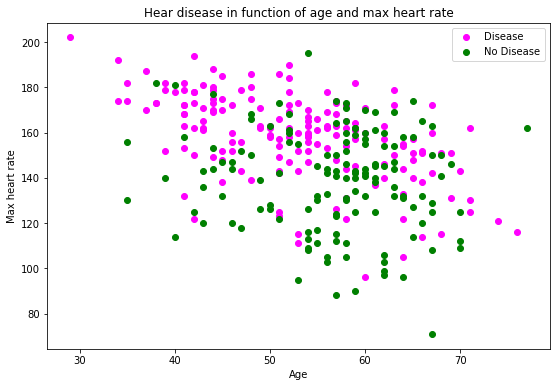

In [17]:
#create figure
plt.figure(figsize=(9,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c='magenta')

# scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c='green')

# add some helpful info
plt.title('Hear disease in function of age and max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease','No Disease']);

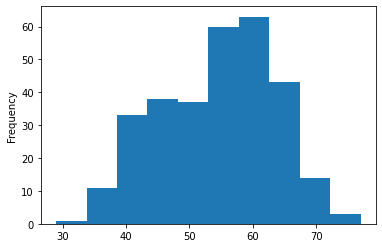

In [18]:
# check the distribution of age column with histogram
df.age.plot.hist();

### Heart disease frequency per chest pain values

In [19]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


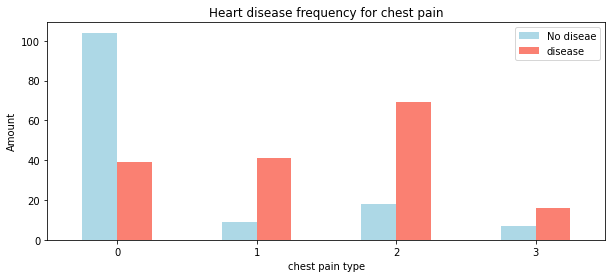

In [20]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,4),color=['lightblue','salmon'])
plt.xlabel("chest pain type")
plt.ylabel('Amount')
plt.title("Heart disease frequency for chest pain")
plt.legend(['No diseae','disease'])
plt.xticks(rotation=0);

# 155 Finding paterns 3

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
# Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


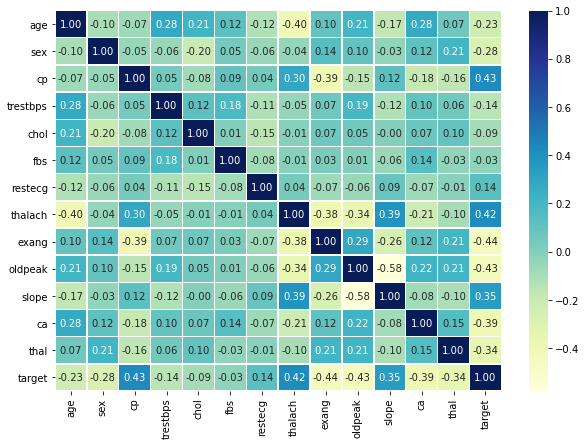

In [23]:
# let's make correlation matrix more prettier
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu');

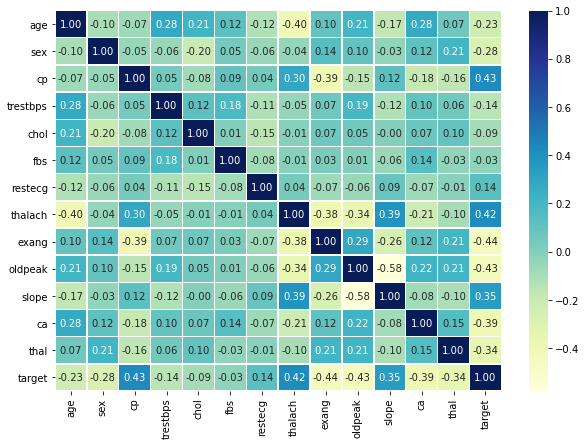

In [24]:
fig,ax=plt.subplots(figsize=(10,7))
ax=sns.heatmap(df.corr(),annot=True,linewidths=0.5,fmt='.2f',cmap='YlGnBu')

# 156 Preparing our data for machine lerning model

### Problem definiton
given clinical parameters can we predict there is heart disease or not

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# split data into tain and test
x=df.drop('target',axis=1)

y=df.target

In [27]:
y.head() # test

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
x.head() # train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
# split data into train and test sets
np.random.seed(42)

# split into train and test
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=.2)

In [30]:
x_train.shape,y_train.shape

((242, 13), (242,))

### Model selection
Now we got our data into train and test split it's time to 
we will trai our data on traiing set (finding patterns)
and we'll test it on test set (use the pattern)

# 157 choosing right model

we are going to try 3 machine learing models   
1.Logistic regression  
2.Random forest classifier   
3.K-neighbor classifier   

In [31]:
# put models in dictionary
models={'Lg':LogisticRegression(),
        'knn':KNeighborsClassifier(),'rfc':RandomForestClassifier()}

# create function to fit and score models
def fit_score(models,x_train,x_test,y_train,y_test):
    '''
    fit and evaluate given machine leraning models
    models:dictionary with different models
    x_train: traing data set (no lables)
    x_test: test data set (no lables)
    y_train: traing lables 
    y_test: test lables
    '''
    # set random seed
    np.random.seed(42)
    
    # make dictionary o keep model score
    model_score={}
    
    # loop through models
    for name,model in models.items():
        # fit the model
        model.fit(x_train,y_train)
        #evaluate the model append score to model_score
        model_score[name]=model.score(x_test,y_test)
    return model_score

# 158 Exprimenting with machine learning models

In [32]:
model_scores=fit_score(models=models,
                      x_train=x_train,
                      x_test=x_test,
                      y_train=y_train,y_test=y_test)
model_scores

E:\Class_Pooja\anaconda\envs\Pooja\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Lg': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'rfc': 0.8360655737704918}

### Model comparision

In [33]:
model_compare=pd.DataFrame(model_scores,index=['accuarcy'])
model_compare

,Lg,knn,rfc
accuarcy,0.885246,0.688525,0.836066


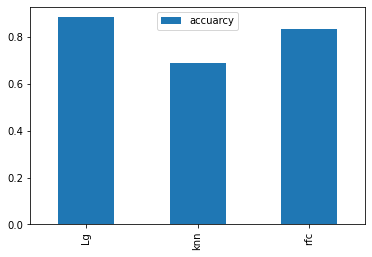

In [34]:
model_compare.T.plot.bar();

# 159 tuning and improving model

Now we have got a baseline model .. and we konw a model's first 
prdiction aren't always what we should based our next step off.
what should do?

let's look at following:
* hyperparameter tuning
* feature importance
* cnfusion matrix
* cross validation
* precision
* recall
* f1 score
* Classification report 
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [40]:
# let's tune KNN 
train_score=[]
test_score=[]

# create list of different values for n_neighbors
n=range(1,21)

#setup instance
knn=KNeighborsClassifier()

# loop through different neighbors
for i in n:
    knn.set_params(n_neighbors=i)
    
    # fit the algorithm
    knn.fit(x_train,y_train)
    
    # update training score
    train_score.append(knn.score(x_train,y_train))
    
    #upate test score
    test_score.append(knn.score(x_test,y_test))


In [41]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

maximum score on test data set: 75.41%


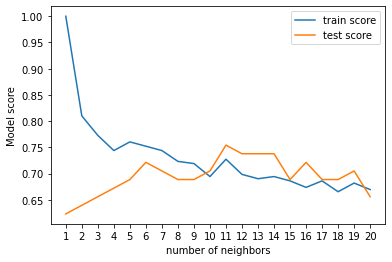

In [43]:
plt.plot(n,train_score,label='train score')
plt.plot(n,test_score,label='test score')
plt.xlabel('number of neighbors')
plt.ylabel('Model score')
plt.xticks(np.arange(1,21,1))
plt.legend()

print(f"maximum score on test data set: {max(test_score)*100:.2f}%")

# 160 Tunig hyperparameter

### Hyperparameter tuning with RandomizedsearchCV

we are going to tune:
* Logistic regression model
* RandomforestClassifier

using RandomizedSearchCV

In [44]:
# create a hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

# create a hyperparameter grid for Randomforestclassifier
rf_grid={'n_estimators':np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }

In [45]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [46]:
np.arange(10,1000,50)

array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])

# 161 Tunig hyperparameter

Now we got hyperparameter grid for each model
let's tune them using RandomizedSerachCV

In [47]:
# Tune logistic regression

np.random.seed(42)
# setup random hyperparameter search for logistic regresion
rs_log_res=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# fit random hyperparameter for logistic regression
rs_log_res.fit(x_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [48]:
# Tune RandomForestClassifier

np.random.seed(42)
# setup random hyperparameter search for logistic regresion
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

# fit random hyperparameter for logistic regression
rs_rf.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [49]:
# find best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [50]:
# Evaluate random seach random forest classifier model
rs_rf.score(x_test,y_test)

0.8688524590163934

In [51]:
model_scores

{'Lg': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'rfc': 0.8360655737704918}

### tuining hyperparameters
1. By hand
2. RandomizedserachCv
3. GridSearchCv

# 162 Tunig hyperparameter

###  hyperparameter tuning using GridSerachCV

since, our Logistic regression model provieds the best score so far,
we'll try and improve againg using GridSearchCV...

In [52]:
# different hyperparametrs for our logistic regression model
log_reg_gridcv={"C":np.logspace(-4,4,30),
               "solver":["liblinear"]}

# setup hyperparameter for logistic regression
gs_log_gridcv=GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_gridcv,
                          cv=5,
                          verbose=True)

# fit the hyperparameters
gs_log_gridcv.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [53]:
# check best hyperparameter
gs_log_gridcv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Evaluate gridserch logistic regression model
gs_log_gridcv.score(x_test,y_test)

0.8852459016393442

In [55]:
model_scores

{'Lg': 0.8852459016393442,
 'knn': 0.6885245901639344,
 'rfc': 0.8360655737704918}

# 163 Evaluating our model

### Evaluating our tuned machine learning model classifier, beyond accuracy

* ROC curve AUC score
* Confusion matrix
* Classification report 
* Precision ,recall ,f1 score
....and it would be great to use cross validtion was used possible

To make comparision and evaluate our trained model, first we need to make prediction

In [56]:
# make prediction with tuned model
y_pred=gs_log_gridcv.predict(x_test)

In [57]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [58]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

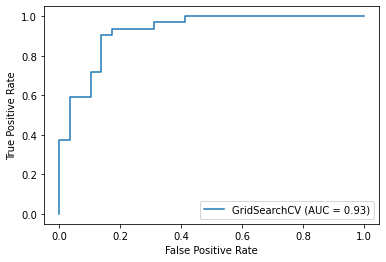

In [59]:
# import ROC curve from sklearn.metrics model
# plot roc curve and calculate and calculate AUC metrics
plot_roc_curve(gs_log_gridcv,x_test,y_test);

In [60]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[25  4]
 [ 3 29]]


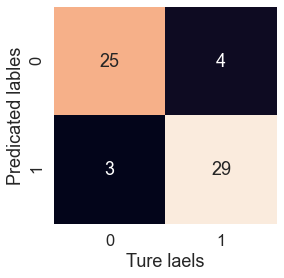

In [61]:
sns.set(font_scale=1.5)
def plot_con_mat(y_test,y_preds):
    '''
    plots a nice looking using seaborn
    '''
    fig,ax=plt.subplots(figsize=(4,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_pred),
                   annot=True,
                   cbar=False)
    plt.xlabel('Ture laels')
    plt.ylabel('Predicated lables')
    
plot_con_mat(y_test,y_pred)
                   

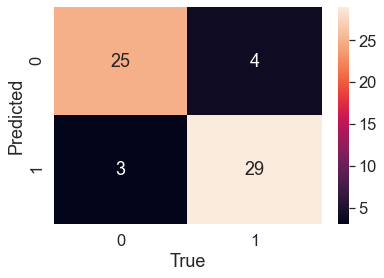

In [62]:
# another direct way
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted');

# 164 Evaluating our model 2

now we got roc curve ,confusion matrix 
let's get clssification report, crossvalidation precision,recall ,f1 score

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# 165 Evaluating our model 3

### claculate evaluaion using cross validation

we are going to calculate precision recall and f1 score of our model 
using cross validation for this we use 'cross_val_score'

In [64]:
# check best hyperparameter

In [65]:
gs_log_gridcv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [66]:
# create a new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,
                       solver='liblinear')

In [67]:
x.shape,y.shape

((303, 13), (303,))

In [68]:
# cross validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [69]:
# corss validated precision
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [70]:
# corss validated recall
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9272727272727274

In [72]:
# corss validated f1 score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [74]:
# Visualize our cross validated matrix
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                       "Precision":cv_precision,
                       "Recall":cv_recall,
                       "F1 score":cv_f1},index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1 score
0,0.847978,0.821587,0.927273,0.87054


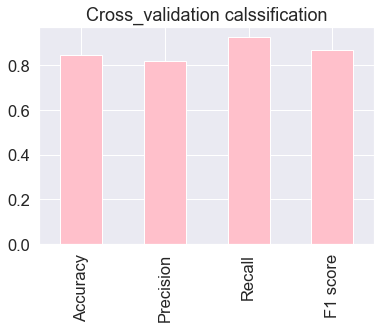

In [79]:
cv_metrics.T.plot.bar(title='Cross_validation calssification',legend=False,color='pink');

# 166 Finding the most important features

### feature importance

which feature contributed to the outcomes of the model and how did they  contribute?

finding feature importance is different for each machine learning models

let's find feature importance for logistic regression

In [83]:
# fit an instance for logistic regression
clf=LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [84]:
#check coefficicent
clf.coef_

array([[ 0.00316728, -0.86044622,  0.66067059, -0.01156993, -0.00166374,
         0.04386122,  0.31275815,  0.02459361, -0.60413062, -0.5686283 ,
         0.45051625, -0.63609881, -0.67663383]])

In [86]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [85]:
# Match coef features to cloumns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775089892488,
 'sex': -0.8604462193284903,
 'cp': 0.6606705857793441,
 'trestbps': -0.01156993031867032,
 'chol': -0.0016637442407918324,
 'fbs': 0.04386122408903933,
 'restecg': 0.31275815497333875,
 'thalach': 0.024593612835517458,
 'exang': -0.6041306248075571,
 'oldpeak': -0.5686282991341255,
 'slope': 0.4505162464116119,
 'ca': -0.6360988070697587,
 'thal': -0.6766338279094292}

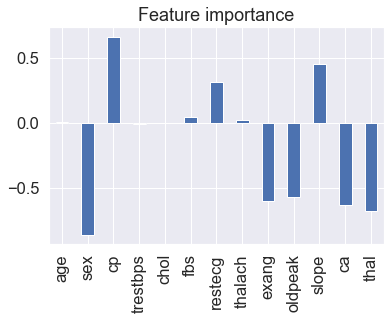

In [88]:
# visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
# T for transpose
feature_df.T.plot.bar(title='Feature importance',legend=False);

In [89]:
pd.crosstab(df['sex'],df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [91]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 167 

# 6. Exprimentation

if you haven't hit your evaluation metrics yet...
* could you collect more data?
* could you try better model? CatBoost,XgBoost
* could you improve currnt model? 
* if your model is good enough how would you export it or share it with others?